# Problem statement:-1

Build a recommender system by using cosine simillarties score.




# IMPORTING LIBRARIES

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

# IMPORTING CSV FILE

In [54]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\Recommendation system

01/05/2023  05:48 PM    <DIR>          .
01/05/2023  05:48 PM    <DIR>          ..
01/05/2023  03:07 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:33 PM           537,166 book.csv
11/29/2022  03:33 PM                85 Problem Statement (RS).txt
01/05/2023  05:48 PM            84,045 RECOMMENDATION_SYSTEM-10.ipynb
               3 File(s)        621,296 bytes
               3 Dir(s)  23,166,898,176 bytes free


In [55]:
books=pd.read_csv("book.csv")

# EDA

In [56]:
books.head(4)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [122]:
books.tail()

,Unnamed: 0,User_ID,Book_Title,Book_Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [57]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [58]:
books.duplicated().sum()

0

In [59]:
books.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


# Feature Renaming

In [60]:
books=books.rename(columns={'User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'})

In [61]:
np.unique(books["User_ID"])

array([     8,      9,     10, ..., 278851, 278852, 278854], dtype=int64)

In [62]:
books.value_counts()

Unnamed: 0  User_ID  Book_Title                                                                Book_Rating
1           276726   Classical Mythology                                                       5              1
6671        3416     At Wits End                                                               1              1
6664        3408     Intimate Evil: A Novel                                                    8              1
6665        3416     Magic Goes Away                                                           8              1
6666        3416     Beloved Exile                                                             8              1
                                                                                                             ..
3334        805      Kissing the Witch: Old Tales in New Skins                                 7              1
3335        805      The DREAMS OUR STUFF IS MADE OF: How Science Fiction Conquered the World  4             

In [63]:
books["User_ID"]

0       276726
1       276729
2       276729
3       276736
4       276737
         ...  
9995    162121
9996    162121
9997    162121
9998    162121
9999    162129
Name: User_ID, Length: 10000, dtype: int64

In [64]:
np.unique(books["Book_Rating"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

# Feature Engineering

In [65]:
books_mod=books.drop("Unnamed: 0",axis=1)

In [66]:
books_mod.head(4)

,User_ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [67]:
books_mod=books_mod.sort_values(["User_ID"])

In [68]:
books_mod.head()

,User_ID,Book_Title,Book_Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7


In [69]:
np.unique(books_mod["Book_Rating"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [70]:
books_mod["Book_Rating"].value_counts().sort_values()

1       43
2       63
3      146
4      237
6      920
5     1007
9     1493
10    1732
7     2076
8     2283
Name: Book_Rating, dtype: int64

# Visualization

<AxesSubplot:>

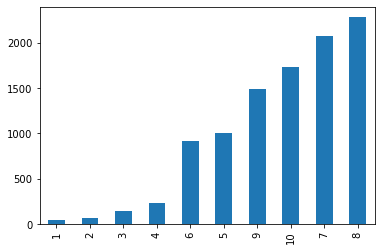

In [71]:
books_mod["Book_Rating"].value_counts().sort_values().plot(kind="bar")

<AxesSubplot:ylabel='Book_Rating'>

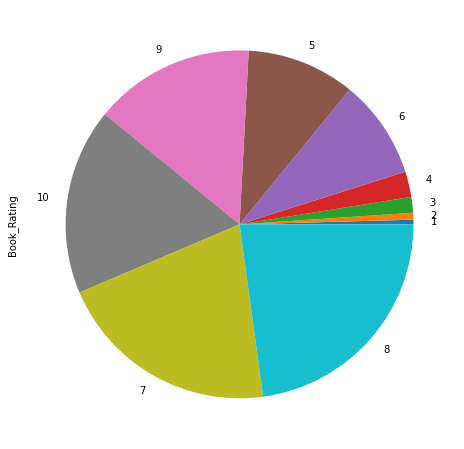

In [126]:
plt.figure(figsize=(8,8))
books_mod["Book_Rating"].value_counts().sort_values().plot(kind="pie")

<AxesSubplot:ylabel='Frequency'>

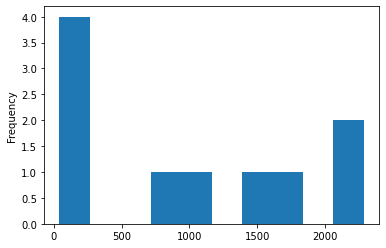

In [128]:
books_mod["Book_Rating"].value_counts().plot(kind="hist")

# number of unique users in the dataset

In [72]:

books_mod["User_ID"].unique()

array([     8,      9,     10, ..., 278851, 278852, 278854], dtype=int64)

In [73]:
len(books_mod["User_ID"].unique())

2182

# Number of unique books in the dataset

In [74]:

books_mod["Book_Title"].unique()

array(['Wings',
       'The Western way: A practical guide to the Western mystery tradition',
       'Ancient Celtic Romances', ..., 'A corrente de Trewis Scott',
       'As valkÃ\xadrias',
       'A Treasury of Irish Myth, Legend, and Folklore'], dtype=object)

In [75]:
len(books_mod["Book_Title"].unique())

9659

In [76]:
books_mod.head(1)

,User_ID,Book_Title,Book_Rating
2401,8,Wings,5


# Converting In To Pivot Table

In [77]:
books_pivot = books_mod.pivot_table(index='User_ID',columns='Book_Title',values='Book_Rating').reset_index(drop=True)

In [78]:
books_pivot.fillna(0,inplace=True)

In [79]:
books_pivot

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
books_pivot.shape

(2182, 9659)

# Using Cosine Similarity

In [81]:
user_sim = 1 - pairwise_distances( books_pivot.values,metric='cosine')

In [82]:
user_sim.shape

(2182, 2182)

In [83]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [84]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
user_sim_df.index = books.User_ID.unique()
user_sim_df.columns = books.User_ID.unique()

In [86]:
user_sim_df.index

Int64Index([276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748,
            276751, 276754,
            ...
            162085, 162091, 162092, 162095, 162103, 162107, 162109, 162113,
            162121, 162129],
           dtype='int64', length=2182)

In [87]:
user_sim_df.columns

Int64Index([276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748,
            276751, 276754,
            ...
            162085, 162091, 162092, 162095, 162103, 162107, 162109, 162113,
            162121, 162129],
           dtype='int64', length=2182)

In [88]:
books.User_ID.unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [89]:
np.fill_diagonal(user_sim, 0)
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Most Similar Users

In [90]:

print(user_sim_df.idxmax(axis=1)[1348])
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(50))

276726
1775      1.000000
278160    1.000000
3350      1.000000
161458    1.000000
278620    1.000000
92        1.000000
3944      1.000000
161390    1.000000
3619      1.000000
161361    1.000000
161343    1.000000
3293      1.000000
277353    1.000000
277351    1.000000
2203      1.000000
277601    1.000000
277945    1.000000
367       1.000000
3538      1.000000
1782      1.000000
2883      1.000000
277958    0.752577
3462      0.707107
276820    0.707107
161951    0.668965
3473      0.668965
3910      0.662266
161480    0.662266
161443    0.613941
161232    0.613941
1368      0.549972
4226      0.549972
4203      0.515325
4228      0.515325
3506      0.502571
3896      0.502571
161922    0.500000
161119    0.498464
278637    0.498464
277205    0.495904
1650      0.495904
161225    0.476290
3402      0.476290
291       0.463241
2074      0.463241
1859      0.453638
2045      0.453638
277820    0.437426
4301      0.437426
3111      0.384900
dtype: float64


In [95]:
user_sim_df.sort_values([1348],ascending=False).head(100)

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
books[(books['User_ID']==1348) | (books['User_ID']==2576)]

,Unnamed: 0,User_ID,Book_Title,Book_Rating
3915,3916,1348,Fantastic Beasts and Where to Find Them,7
3916,3917,1348,Stardust,8
5699,5700,2576,Stardust,10


In [113]:
books[(books['User_ID']==1448) | (books['User_ID']==160)]

,Unnamed: 0,User_ID,Book_Title,Book_Rating
2480,2481,160,Creative Visualization: Use the Power of Your ...,6
2481,2482,160,"Way of the Peaceful Warrior, 20th Anniversary ...",8
2482,2483,160,Running from Safety: An Adventure of the Spirit,7
2483,2484,160,The Bridge Across Forever,8
2484,2485,160,A Gift of Wings,7
2485,2486,160,One,8
4087,4088,1448,Feast of All Saints,6


# Building Recommendation System Function

In [129]:
def get_rec(customer_id):
   
    tem=list(user_sim_df.max(axis=1).sort_values(ascending=False).head(100).index)
   
    book_list=list(books[books["User_ID"].isin(tem)]["Book_Title"])
    #print(movie_list)
    return set(book_list)-set(books[books["User_ID"]==customer_id]["Book_Title"])

# Checking Recommendation

In [130]:
get_rec(52534)

{'11th Hour',
 '13 99 Euros',
 '5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death',
 'A Charles Williams Reader',
 'A Feather on the Breath of God: A Novel',
 'A Light in the Attic',
 'A Man of Steel',
 "A Mother's Trial",
 "A Single Tear: A Family's Persecution, Love, and Endurance in Communist China",
 'A Stitch in Time: A Quilt Trilogy (Quilt Trilogy, No 1)',
 'A Whole New Light',
 'A lexicon of Jewish cooking: A collection of folklore, foodlore, history, customs, and recipes',
 'Age of War  (Super Bolan #90)',
 'Alchemy and Academe',
 'All Fall Down',
 "All the King's Men",
 'Amber Brown Goes Fourth (Amber Brown (Paperback))',
 'American Steel: Hot Metal Men and the Resurrection of the Rust Belt',
 'Amy Carmichael: Let the Little Children Come',
 'Angel: City of (Angel)',
 'Aprende Fotografia/Learn Photography',
 'April Fool Dead: A Death on Demand Mystery',
 'Astronomy Made Simple (Made Si